In [ ]:
#Installing all the required packages
!pip install ffmpeg
!pip install imageio-ffmpeg
!pip install imageio==2.4.1
!pip install git+https://github.com/openai/whisper.git
!pip install whisper

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=cdb3828f2c38f75a71c72eba2e9ee6d5d429fbec1345721c49e1bcb9eb2a7b08
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303884 sha256=1bbe4a2ec66472be91bce1e17fa3a292b34ef79fe5d6ff345d9d0311a86f71e3
  Stored in directory: /root/.cache/pip/wheels/96/5d/ce/bdbdb04744dac03906336eb0d01ff1e222061d3419c55c55f9
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.34.2
    Uninstalling imageio-2.34.2:
      Successfully uninstalled imageio-2.34.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

In [ ]:
#Importing all the necessary Libraries
import numpy as np
import pandas as pd
import string
import tkinter
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from IPython.display import Image
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
import moviepy.editor
from tkinter.filedialog import *
import whisper
from transformers import pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
model = whisper.load_model("large")

100%|██████████████████████████████████████| 2.88G/2.88G [00:30<00:00, 103MiB/s]
  checkpoint = torch.load(fp, map_location=device)



In [ ]:
class sentiment_analyzer():
    AUDIO_FILE_NAME='Emotions_2.mp3'
    INPUT_VIDEO_NAME='/content/Mark Rober Address to MIT Class of 2023.mp4'
    def sentimentAnalyser(self,sentiment_text):
        #Analyzing the overall sentiment of the content
        score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
        negative = score['neg']
        positive = score['pos']
        if negative > positive:
            return "Negataive Sentiment"
        elif positive > negative:
            return "Positive Sentiment"
        else:
            return "Neutral Sentiment"

    #Plotting a Percentage Pie Chart of Emotion Distribution
    def plot_chart(self,emotion_count_list):
        fig, axis1 = plt.subplots(figsize = (10,10))
        total = sum(emotion_count_list.values())
        wedges, texts, _ = axis1.pie(emotion_count_list.values(), autopct=lambda pct: '{:.2f}%'.format(pct), textprops=dict(color="w"))
        axis1.legend(wedges, emotion_count_list.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        axis1.set_title("Emotion Distribution")
        plt.savefig("emotion_distribution.png")
        plt.clf()
        display(Image("emotion_distribution.png"))

    def execute(self):
        #Importing the samplevideo file and converting it in audiofile
        video = moviepy.editor.VideoFileClip(self.INPUT_VIDEO_NAME)
        aud = video.audio
        aud.write_audiofile(self.AUDIO_FILE_NAME)

        #Converting the audiofile in text and storing it in a Dictionary with key "text"
        transcribed_data = model.transcribe(self.AUDIO_FILE_NAME)
        text_data = transcribed_data["text"]

        #Changing the text in lowercase and cleaning it to make it easier to analyze
        lower_case = text_data.lower()
        clean = lower_case.translate(str.maketrans("","",string.punctuation)).strip()

        #Coverting the text in form of tokens
        token_text = word_tokenize(clean,"english")

        #Removing all the stopwords{Words which basically don't show any sentiments
        final_words = []
        for word in token_text:
            if word not in stopwords.words('english'):
                final_words.append(word)


        emotion_list = []
        #Formatting the sentiment.txt and splitting it in words and the emotion they relate to
        with open('/content/sentiment.txt') as file:
                for line in file:
                    clean_line = line.replace("\n","").replace(",","").replace("'","").strip()
                    word,emotion = clean_line.split(":")

                    #Creating lists of emotions conveyed by words in final_words
                    if word in final_words:
                        emotion_list.append(emotion)

        #Creating a dictionary that keeps count of all the emotions
        emotion_dict = Counter(emotion_list)

        #final sentiment
        sentiment_of_text=self.sentimentAnalyser(clean)
        print(sentiment_of_text)

        print(emotion_dict)
        self.plot_chart(emotion_dict)

MoviePy - Writing audio in Emotions_2.mp3


MoviePy - Done.
Positive Sentiment
Counter({' happy': 4, ' surprise': 2, ' esteemed': 2, ' sad': 2, ' bored': 1, ' angry': 1, ' focused': 1, ' obsessed': 1, ' free': 1, ' fearless': 1, ' attached': 1, ' alone': 1, ' embarrassed': 1})


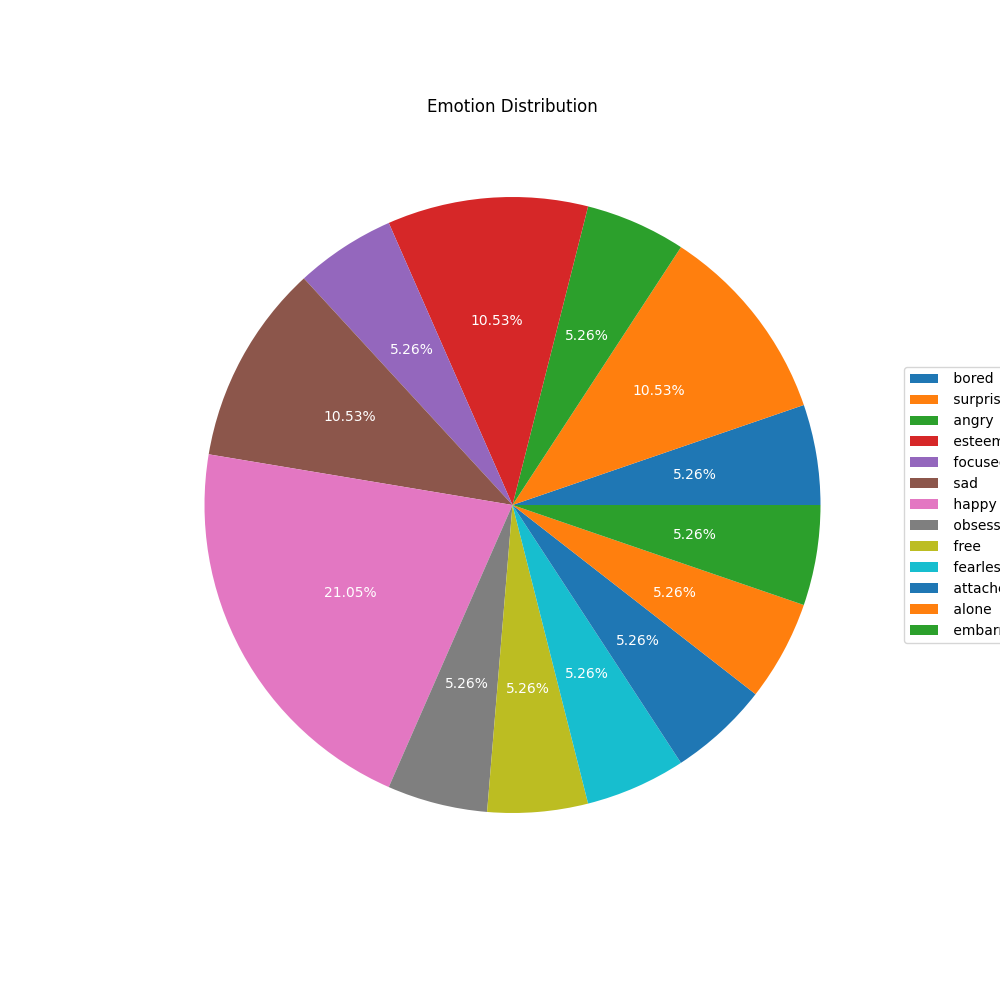

In [ ]:
#Creating instance of a "sentiment_analyzer" object and calling its "execute" method
sentiment_analyzer_obj=sentiment_analyzer()
sentiment_analyzer_obj.execute()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk import word_tokenize
from collections import Counter
import nltk

# Ensure necessary libraries are installed
nltk.download('punkt')
nltk.download('stopwords')

class sentiment_analyzer():
    # Assuming the same class definition from before

    # Prediction on a single input
    def predict_sentiment(self, text):
        clean_text = self.clean_text(text)
        return self.sentimentAnalyser(clean_text)

    def predict_emotions(self, text):
        clean_text = self.clean_text(text)
        final_words = self.tokenize_and_remove_stopwords(clean_text)
        return self.detect_emotions(final_words)

    # Cleaning text
    def clean_text(self, text):
        lower_case = text.lower()
        clean = lower_case.translate(str.maketrans("", "", string.punctuation)).strip()
        return clean

    # Tokenizing and removing stopwords
    def tokenize_and_remove_stopwords(self, clean):
        token_text = word_tokenize(clean, "english")
        final_words = [word for word in token_text if word not in stopwords.words('english')]
        return final_words

    # Emotion detection using the sentiment.txt file
    def detect_emotions(self, final_words):
        emotion_list = []
        with open('/content/sentiment.txt', 'r') as file:
            sentiment_dict = {line.split(":")[0].strip(): line.split(":")[1].strip() for line in file}
            for word in final_words:
                if word in sentiment_dict:
                    emotion_list.append(sentiment_dict[word])
        return emotion_list

    # Sentiment Analysis function same as before
    def sentimentAnalyser(self, sentiment_text):
        score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
        negative = score['neg']
        positive = score['pos']
        if negative > positive:
            return "Negative Sentiment"
        elif positive > negative:
            return "Positive Sentiment"
        else:
            return "Neutral Sentiment"

# Test Dataset (ground truth sentiment and emotions)
test_data = [
    {"text": "I am very happy today!", "sentiment": "Positive Sentiment", "emotions": ["happy"]},
    {"text": "I am so sad and upset.", "sentiment": "Negative Sentiment", "emotions": ["sad"]},
    {"text": "The event was okay, nothing special.", "sentiment": "Neutral Sentiment", "emotions": []}
]

# Lists to store actual and predicted values
actual_sentiments = []
predicted_sentiments = []
actual_emotions = []
predicted_emotions = []

# Initialize the analyzer
analyzer = sentiment_analyzer()

# Iterate through test data to collect predictions
for item in test_data:
    text = item['text']

    # Predict sentiment
    predicted_sentiment = analyzer.predict_sentiment(text)
    predicted_sentiments.append(predicted_sentiment)

    # Predict emotions
    predicted_emotion_list = analyzer.predict_emotions(text)
    predicted_emotions.append(predicted_emotion_list)

    # Append actual labels
    actual_sentiments.append(item['sentiment'])
    actual_emotions.append(item['emotions'])

# Calculate accuracy for sentiment analysis
accuracy_sentiment = accuracy_score(actual_sentiments, predicted_sentiments)
precision_sentiment = precision_score(actual_sentiments, predicted_sentiments, average='macro')
recall_sentiment = recall_score(actual_sentiments, predicted_sentiments, average='macro')
f1_sentiment = f1_score(actual_sentiments, predicted_sentiments, average='macro')

print(f"Sentiment Analysis - Accuracy: {accuracy_sentiment}")
print(f"Sentiment Analysis - Precision: {precision_sentiment}")
print(f"Sentiment Analysis - Recall: {recall_sentiment}")
print(f"Sentiment Analysis - F1 Score: {f1_sentiment}")

# For emotion detection accuracy, we compare the emotions as sets
correct_predictions = sum([Counter(actual) == Counter(predicted) for actual, predicted in zip(actual_emotions, predicted_emotions)])
emotion_accuracy = correct_predictions / len(test_data)

print(f"Emotion Detection - Accuracy: {emotion_accuracy}")
5

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
  _warn_prf(average, modifier, msg_start, len(result))



Sentiment Analysis - Accuracy: 0.6666666666666666
Sentiment Analysis - Precision: 0.5
Sentiment Analysis - Recall: 0.6666666666666666
Sentiment Analysis - F1 Score: 0.5555555555555555
Emotion Detection - Accuracy: 0.3333333333333333


5

In [ ]:
def plot_emotion_sentiment_over_time(timestamps, emotion_data, sentiment_data):
    plt.figure(figsize=(10,6))

    # Plot sentiment over time
    plt.plot(timestamps, sentiment_data, label="Sentiment", color='b')

    # Plot emotions over time
    for emotion, values in emotion_data.items():
        plt.plot(timestamps, values, label=emotion)

    plt.xlabel('Time (s)')
    plt.ylabel('Emotion/Sentiment Intensity')
    plt.title('Emotion and Sentiment Over Time')
    plt.legend()
    plt.show()

# Call this method with timestamps, emotion data, and sentiment scores